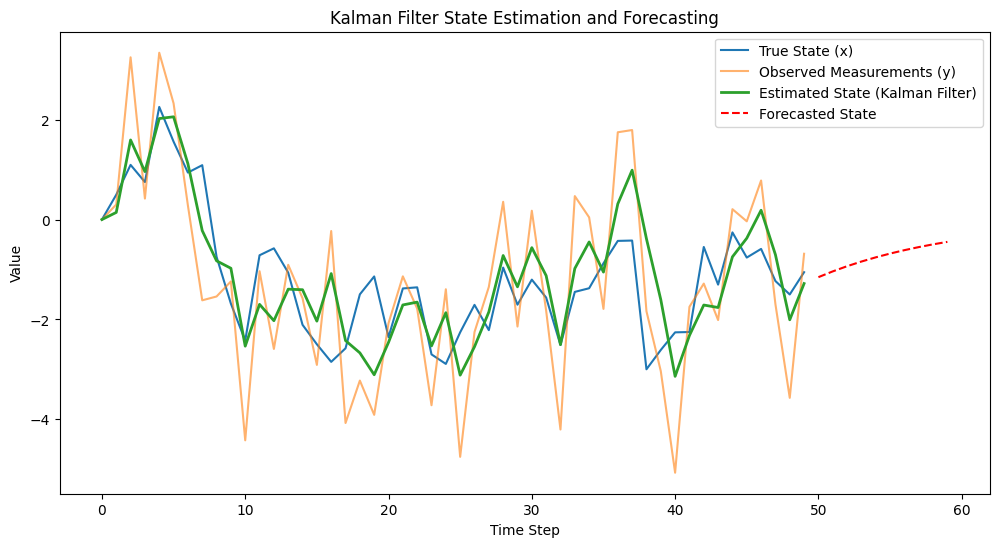

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # For reproducibility

# Parameters
a = 0.9
q = 1    # Process noise variance
r = 2    # Measurement noise variance
n_steps = 50  # Number of time steps

# Generate data
x_true = np.zeros(n_steps)
y_observed = np.zeros(n_steps)
x_true[0] = 0

for t in range(1, n_steps):
    w_t = np.random.normal(0, np.sqrt(q))
    v_t = np.random.normal(0, np.sqrt(r))
    x_true[t] = a * x_true[t - 1] + w_t
    y_observed[t] = x_true[t] + v_t

# Kalman Filter Implementation
x_estimate = np.zeros(n_steps)
P = np.zeros(n_steps)
K = np.zeros(n_steps)
x_estimate[0] = 0
P[0] = 1

for t in range(1, n_steps):
    # Prediction
    x_pred = a * x_estimate[t - 1]
    P_pred = a**2 * P[t - 1] + q
    
    # Update
    K[t] = P_pred / (P_pred + r)
    x_estimate[t] = x_pred + K[t] * (y_observed[t] - x_pred)
    P[t] = (1 - K[t]) * P_pred

# Forecasting
n_forecast = 10
x_forecast = np.zeros(n_forecast)
x_last_estimate = x_estimate[-1]

for k in range(1, n_forecast + 1):
    x_forecast[k - 1] = a**k * x_last_estimate

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(range(n_steps), x_true, label='True State (x)')
plt.plot(range(n_steps), y_observed, label='Observed Measurements (y)', alpha=0.6)
plt.plot(range(n_steps), x_estimate, label='Estimated State (Kalman Filter)', linewidth=2)
plt.plot(range(n_steps, n_steps + n_forecast), x_forecast, label='Forecasted State', linestyle='--', color='red')
plt.legend()
plt.title('Kalman Filter State Estimation and Forecasting')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()
